Camera calibration, triangulation, relative orientation
===========

1. Projection functions: image to world coordinates
2. 3D bundle intersection (triangulation)
3. Essential matrix & relative orientation
-------------------------------------

Install dependencies
---------------------------

In [ ]:
import os
from os.path import exists, join, basename, splitext
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import svd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from google.colab import drive
drive.mount('/content/drive')

YOUR_PATH = '/content/drive/MyDrive/prog/'
%cd $YOUR_PATH
!pwd

%cd $YOUR_PATH"P5/"
!pwd
!pip3 install --force-reinstall *.whl


Mounted at /content/drive
/content/drive/MyDrive/prog
/content/drive/MyDrive/prog
/content/drive/MyDrive/prog/P5
/content/drive/MyDrive/prog/P5
Processing ./MMVII-0.0.2-cp310-cp310-linux_x86_64.whl


Get data
--------

In [ ]:
help(MMVII)

In [ ]:
import MMVII
from MMVII import *

dirData = '/content/drive/MyDrive/prog/P5/Saisies-MMV1'

im1name = 'IMGP4167.JPG'
im2name = 'IMGP4168.JPG'
im3name = 'IMGP4169.JPG'
im4name = 'IMGP4170.JPG'

MMVII path: /usr/local/MMVII/MMVII


In [ ]:
print(dir(MMVII))

['AimeDescriptor', 'AimePCAR', 'Box1di', 'Box1dr', 'Box2di', 'Box2dr', 'Box3di', 'Box3dr', 'DataIm2Df', 'DataIm2Di', 'DataIm2Dr', 'DataIm2Duc', 'DataInvertOfMapping2D', 'DataInvertibleMapping2D', 'DataMapping2D', 'DataMapping2Dto3D', 'DataMapping3Dto2D', 'Im2Df', 'Im2Di', 'Im2Dr', 'Im2Duc', 'InvertMappingFromElemHomol', 'Isometry3D', 'MM_Module', 'MapIm2PProj', 'MapPProj2Im', 'Matrixf', 'Matrixr', 'MemCheck', 'MemManager', 'MemState', 'Mes1GCP', 'MesIm1Pt', 'ModeInitImage', 'Path', 'PerspCamIntrCalib', 'Pt1df', 'Pt1di', 'Pt1dr', 'Pt2df', 'Pt2di', 'Pt2dr', 'Pt3df', 'Pt3di', 'Pt3dr', 'Rect1', 'Rect2', 'Rect3', 'Rotation3D', 'SensorCamPC', 'SetAimePCAR', 'SetMesGCP', 'SetMesPtOf1Im', 'TyNums', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'infEq', 'infStr', 'mm_data_path', 'mmv2_install_relative_path', 'mmv2_src_relative_path', 'norm1', 'norm2', 'normInf', 'normK', 'os', 'p', 'ptInfEq', 'ptInfStr', 'ptSupEq', 'supEq', 'sys', 'tes

In [ ]:
# Read image points
pts2D = {
    im1name : SetMesPtOf1Im.fromFile(dirData + '/Saisies_MMVII/MesIm-' + im1name + '.xml'),
    im2name : SetMesPtOf1Im.fromFile(dirData + '/Saisies_MMVII/MesIm-' + im2name + '.xml'),
    im3name : SetMesPtOf1Im.fromFile(dirData + '/Saisies_MMVII/MesIm-' + im3name + '.xml'),
    im4name : SetMesPtOf1Im.fromFile(dirData + '/Saisies_MMVII/MesIm-' + im4name + '.xml')
}
print(pts2D)

{'IMGP4167.JPG': SetMesPtOf1Im MesIm-IMGP4167.JPG.xml
Stone-6 644.28631 232.68332
Stone-7 1265.3681 735.26883
Grille 322.0761 766.81187
, 'IMGP4168.JPG': SetMesPtOf1Im MesIm-IMGP4168.JPG.xml
I-of-I 430.52658 227.09033
u-of-You 495.71763 454.82555
Acute 431.73528 510.22299
Finger-1 316.37335 471.67818
Stone-6 667.40203 479.73159
Stone-7 1284.0512 981.02114
Grille 362.60202 1078.9645
, 'IMGP4169.JPG': SetMesPtOf1Im MesIm-IMGP4169.JPG.xml
I-of-I 475.16115 516.40452
u-of-You 538.99942 732.99539
Acute 475.85036 802.54804
Finger-1 362.72111 789.30712
Stone-6 706.13927 741.52595
, 'IMGP4170.JPG': SetMesPtOf1Im MesIm-IMGP4170.JPG.xml
I-of-I 452.27814 808.19281
u-of-You 521.27278 1015.5276
Acute 458.442 1100.8313
Finger-1 344.78572 1112.9228
}


In [ ]:
help(pts2D[im1name].measures()[0])

Help on MesIm1Pt in module _MMVII object:

class MesIm1Pt(pybind11_builtins.pybind11_object)
 |  class for representing the measure of a point in an image
 |  
 |  Method resolution order:
 |      MesIm1Pt
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: _MMVII.MesIm1Pt) -> None
 |      
 |      2. __init__(self: _MMVII.MesIm1Pt, arg0: _MMVII.Pt2dr, arg1: str, arg2: float) -> None
 |  
 |  __repr__(...)
 |      __repr__(self: _MMVII.MesIm1Pt) -> str
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  namePt
 |  
 |  pt
 |  
 |  sXX
 |      Sigma2 of x coordinate
 |  
 |  sYY
 |      Sigma2 of y coordinate
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from pybind11_builtins.pybind11_objec

In [ ]:
# Read 3D world coordinates corresponding to image points
pts3D = SetMesGCP.fromFile(dirData + '/Saisies_MMVII/MesGCP_Ground-Pts3D.xml')

for pt3D in pts3D.measures() :
  print(pt3D.namePt, pt3D.pt)

Stone-1 Pt3dr(0.182895665614618,-3.78002060469805,2.56022810571964)
Stone-2 Pt3dr(0.234792215591027,-5.36333800580975,2.42659720440635)
Stone-3 Pt3dr(0.194213046998493,-4.82293063921051,1.7537725591411)
I-of-I Pt3dr(0.754045221758524,0.496427193197003,0.431416432371162)
Acute Pt3dr(0.898750585424819,1.10409507249266,0.444680581722014)
Finger-1 Pt3dr(1.31771333753879,0.989188464947305,0.370627429238322)
Stone-6 Pt3dr(0.150697933447584,1.10818337179322,0.773464897817899)
Stone-7 Pt3dr(0.256396378205514,2.35318759021626,2.23887785258234)
Grille Pt3dr(1.40207519252832,2.19454588983995,0.403829859842775)


In [ ]:
# Read extrinsic parameters
extrinsics = {
    im1name : SensorCamPC.fromFile(dirData + '/Ori-Ground-MMVII/Ori-PerspCentral-' + im1name + '.xml'),
    im2name : SensorCamPC.fromFile(dirData + '/Ori-Ground-MMVII/Ori-PerspCentral-' + im2name + '.xml'),
    im3name : SensorCamPC.fromFile(dirData + '/Ori-Ground-MMVII/Ori-PerspCentral-' + im3name + '.xml'),
    im4name : SensorCamPC.fromFile(dirData + '/Ori-Ground-MMVII/Ori-PerspCentral-' + im4name + '.xml')
}

In [ ]:
sub = '__'
for method in dir(SensorCamPC):
    if sub not in method:
        print(method)

axeI
axeJ
axeK
center
degreeVisibility
degreeVisibilityOnImFrame
fromFile
ground2Image
ground2ImageAndDepth
imageAndDepth2Ground
internalCalib
nameOri_From_Image
omega
pose
prefixName
szPix
toFile


In [ ]:
help(extrinsics[im1name])

Help on SensorCamPC in module _MMVII object:

class SensorCamPC(pybind11_builtins.pybind11_object)
 |  Class for modelizing the geometry of perspective-central image,
 |  contain essentially a pose (Centre+rotation) and a pointer to a
 |  (generally) shared internall calibration
 |  
 |  Method resolution order:
 |      SensorCamPC
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: _MMVII.SensorCamPC, arg0: str, arg1: _MMVII.Isometry3D, arg2: _MMVII.PerspCamIntrCalib) -> None
 |  
 |  __repr__(...)
 |      __repr__(self: _MMVII.SensorCamPC) -> str
 |  
 |  degreeVisibility(...)
 |      degreeVisibility(self: _MMVII.SensorCamPC, arg0: _MMVII.Pt3dr) -> float
 |  
 |  degreeVisibilityOnImFrame(...)
 |      degreeVisibilityOnImFrame(self: _MMVII.SensorCamPC, arg0: _MMVII.Pt2dr) -> float
 |  
 |  ground2Image(...)
 |      ground2Image(self: _MMVII.SensorCamPC, arg0: _MMVII.Pt3dr) -> _MMVII.Pt2dr
 |  

In [ ]:
# Read intrinsic parameters (camera calibration + distortions)
calib = PerspCamIntrCalib.fromFile(dirData + '/Ori-Ground-MMVII/Calib-PerspCentral-Foc-28000_Cam-PENTAX_K5.xml')

In [ ]:
help(calib)

Help on PerspCamIntrCalib in module _MMVII object:

class PerspCamIntrCalib(pybind11_builtins.pybind11_object)
 |  this the class for computing the intric calibration of perspective
 |  camera :
 |  
 |  The intric calibration compute the maping from a 3D camera coordinate
 |  to image coordinates. So it is a mapping R3 -> R2, and as is heritates
 |  from cDataMapping<tREAL8,3,2>
 |  
 |  The mapping is made by compination of 3 functions :
 |  
 |  
 |  mProjDir R3->R2 , the projection function, it can be stenope(x/z,y/z), fish-eye , 360 degre -> (teta,phi)  ...
 |     it belongs to a finite set of  possibility code by enumeration eProjPC;  for each model it has no parameter
 |  
 |     dirtortion  R2->R2 , its a function close to identity (at least ideally)
 |  
 |  cMapPProj2Im R2->R2 transformat additmentional unit in pixels
 |  
 |  Method resolution order:
 |      PerspCamIntrCalib
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 | 

### Manipulate data structures

In [ ]:
# interactive exercise with students
for i, (img, _) in enumerate(pts2D.items()):
    print(img)
    print(pts2D[img].measures()[i].namePt)
    print(pts2D[img].measures()[i].pt)
    print((pts2D[img].measures()[i].sXX, pts2D[img].measures()[i].sYY), '\n')

IMGP4167.JPG
Stone-6
Pt2dr(644.286307996219,232.68331645072)
(1.0, 1.0) 

IMGP4168.JPG
u-of-You
Pt2dr(495.717626755149,454.825546116027)
(1.0, 1.0) 

IMGP4169.JPG
Acute
Pt2dr(475.850364860953,802.548038024082)
(1.0, 1.0) 

IMGP4170.JPG
Finger-1
Pt2dr(344.78572136991,1112.92280566175)
(1.0, 1.0) 



In [ ]:
print(pts2D[im1name].measures()[1])

MesIm1Pt Stone-7 [1265.3681,735.26883], sigma2 (xx,xy,yy): 1, 0, 1)


In [ ]:
for p in pts3D.measures():
    print(p.namePt)
    print(p.pt)
    print(p.sXX, p.sYY, p.sZZ, '\n')

Stone-1
Pt3dr(0.182895665614618,-3.78002060469805,2.56022810571964)
1.0 1.0 1.0 

Stone-2
Pt3dr(0.234792215591027,-5.36333800580975,2.42659720440635)
1.0 1.0 1.0 

Stone-3
Pt3dr(0.194213046998493,-4.82293063921051,1.7537725591411)
1.0 1.0 1.0 

I-of-I
Pt3dr(0.754045221758524,0.496427193197003,0.431416432371162)
1.0 1.0 1.0 

Acute
Pt3dr(0.898750585424819,1.10409507249266,0.444680581722014)
1.0 1.0 1.0 

Finger-1
Pt3dr(1.31771333753879,0.989188464947305,0.370627429238322)
1.0 1.0 1.0 

Stone-6
Pt3dr(0.150697933447584,1.10818337179322,0.773464897817899)
1.0 1.0 1.0 

Stone-7
Pt3dr(0.256396378205514,2.35318759021626,2.23887785258234)
1.0 1.0 1.0 

Grille
Pt3dr(1.40207519252832,2.19454588983995,0.403829859842775)
1.0 1.0 1.0 



In [ ]:
# exploration
print(extrinsics[im1name].center)
print(extrinsics[im1name].axeI)
print(extrinsics[im1name].axeJ)
print(extrinsics[im1name].axeK)
print(extrinsics[im1name].internalCalib)
print(extrinsics[im1name].szPix,'\n')
print(extrinsics[im1name].pose)
print(extrinsics[im1name].pose.tr)
print(extrinsics[im1name].pose.rot)
print(extrinsics[im1name].pose.rot.array())

Pt3dr(5.20448828567061,1.49496779535545,2.11770763380632)
Pt3dr(-0.162381354909888,0.038317790121003,0.985983794257224)
Pt3dr(-0.162381354909888,0.038317790121003,0.985983794257224)
Pt3dr(-0.162381354909888,0.038317790121003,0.985983794257224)
MMVII.PerspCamIntrCalib
Pt2di(1728,1152) 

Isometry3D((5.20448828567061,1.49496779535545,2.11770763380632),((-0.162381354909888,0.097033570441216,-0.981945406723336),(0.038317790121003,0.995022468273721,0.091989317807644),(0.985983794257224,-0.022688627942267,-0.165291208550926)))
Pt3dr(5.20448828567061,1.49496779535545,2.11770763380632)
Rotation3D([[-0.162381354909888,0.097033570441216,-0.981945406723336],[0.038317790121003,0.995022468273721,0.091989317807644],[0.985983794257224,-0.022688627942267,-0.165291208550926]])
[[-0.16238135  0.09703357 -0.98194541]
 [ 0.03831779  0.99502247  0.09198932]
 [ 0.98598379 -0.02268863 -0.16529121]]


In [ ]:
# exploration
print(calib.degDir) # acces to direct degrees
print(calib.f) # access to focal
print(calib.name) # name of the file
print(calib.pp) # access to principal point
print(calib.szPix) # PixelFrame - NbPix
print(calib.vParamDist()) #

Pt3di(3,1,1)
2112.194961341226
Calib-PerspCentral-Foc-28000_Cam-PENTAX_K5
Pt2dr(856.866902730829,577.613558771481)
Pt2di(1728,1152)
[-0.099311884161592, 0.105599456943292, 0.035385127051667, -8.923787e-08, 9.6643093e-08, -8.96399711e-07, 1.5373804e-08]


# World $→$ image projection

**The task is to project a 3D point (apply extrinsic orientation) and apply camera parameters (distortions and camera calibration, aka intrinsic calibration)**.

$$(i, j) = \mathfrak{J} \left[ \mathfrak{D}  \left[ {\pi} \left(Pose (p) \right) \right]\right] $$


It consists of the following consecutive transformations:
1. $Pose = \{ R, C \}$ : Transform from world to camera frame

$$  Pose(P) = R^T \cdot (P - C) $$

2. $\pi$ : Transform point in camera frame to a bundle (direction)

$$ \pi \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} x/z \\ y/z \\ 1 \end{pmatrix} =  \vec{u} $$

3. $ \mathfrak{D} $ : Apply direct distortion

$$ D(\vec{u}) = \vec{u} (1 + k_2 \rho^2 + k_4 \rho^4 + \cdots ) = \vec{u_{dist}} $$

4. $ \mathfrak{J} = \{ pp_x, pp_y, F \}$ : Apply direct camera calibration, i.e., transform the *distorted* bundle in camera coordinates to a point in pixel coordinates


$$ \mathfrak{J}(\vec{u_{dist}}) =  \begin{pmatrix} \vec{u_{dist}}_x \cdot F + pp_x \\ \vec{u_{dist}}_y \cdot F + pp_y  \end{pmatrix} $$




where $(pp_x,pp_y)$ is the principal point, $F$ is the focal length



### Manipulation of camera orientation parameters

In [ ]:
# interactive exercise with students
help(MMVII)

In [ ]:
def World2Camera(p: SensorCamPC, pt3d: tuple) -> tuple:
    # SensorCamPC = extrinsic params
    # p = extrinsics[im1name]
    P = pt3d
    C = p.center
    R = p.pose.rot.array()

    return R.T @ (P - C) # matmul

def Cam2Bundle(pt3d: tuple) -> tuple:
    return pt3d / pt3d[-1]

# def RadDistOnBundle(coeffs: tuple, bundle: tuple) -> tuple:
#     """
#         bundle = Cam2Bundle(pt3d)
#         coeffs = calib.vParamDist()
#         modèle radial :
#             x_corrected = x * (1 + k1 * r^2 + k2 * r^4 + k3 * r^6)
#             y_corrected = y * (1 + k1 * r^2 + k2 * r^4 + k3 * r^6)
#         r = la distance euclidienne entre le point et le centre de l'image
#     """
#     # les coefficients de distorsion radiale
#     k2, k4, k6 = coeffs[:3] #calib.vParamDist()

#     # calcul de 'r'
#     from math import sqrt
#     bx, by = bundle[0], bundle[1]
#     r = np.sqrt(bx**2 + by**2)

#     # distorsion radiale
#     RadDist_x = bx * (1 + k2 * r**2 + k4 * r**4 + k6 * r**6)
#     RadDist_y = by * (1 + k2 * r**2 + k4 * r**4 + k6 * r**6)
#     z = 1
#     return (RadDist_x, RadDist_y, z)


def RadDistOnBundle(coeffs: tuple, bundle: tuple) -> tuple:
    x, y, _ = bundle
    c1, c2, c3 = coeffs[:3]
    dist = np.sqrt(x**2 + y**2)
    xd = x * (1 + c1*dist**2 + c2*dist**4 + c3*dist**6)
    yd = y * (1 + c1*dist**2 + c2*dist**4 + c3*dist**6)
    return xd, yd, 1

def DecDistOnBundle(coeffs: tuple, bundle: tuple) -> tuple:
  # dx = alpha * (3*x**2 + y**2) + 2*beta*x*y
  # dy = beta * (x**2 + 3*y**2) + 2*alpha*x*y
  pass

def Bundle2Pixel(calib: PerspCamIntrCalib, bundle: tuple) -> tuple:
    """
        bundle = RadDistOnBundle()
    """
    # variables
    RadDist_x, RadDist_y = bundle[0], bundle[1]
    F = calib.f
    pp_x, pp_y = calib.pp[0], calib.pp[1]

    # calculs
    u = RadDist_x * F + pp_x
    v = RadDist_y * F + pp_y
    return (u, v)


def World2Pixel(calib: PerspCamIntrCalib, p: SensorCamPC, pt3d: tuple) -> tuple:
    W2C = World2Camera(p, pt3d)
    C2B = Cam2Bundle(W2C)
    RadDist = RadDistOnBundle(calib.vParamDist(), C2B)
    B2P = Bundle2Pixel(calib, RadDist)
    return B2P


In [ ]:
# Max residual between your projected point and the true value
eps = 3.0
for pt3D in pts3D.measures() :

  for imName in extrinsics:
      if pts2D[imName].nameHasMeasure(pt3D.namePt) :
        pt2D = pts2D[imName].measuresOfName(pt3D.namePt)

        # world to camera frame
        pt = World2Camera(extrinsics[imName], pt3D.pt)
        # print(pt)

        # camera frame to bundle
        pt = Cam2Bundle(pt)
        # print(pt)

        # apply distortion
        pt = RadDistOnBundle(calib.vParamDist(), pt)
        # print(pt)

        # bundle to pixel
        pt = Bundle2Pixel(calib, pt)

        # function that combines all the above stages
        World2Pix = World2Pixel(calib, extrinsics[imName], pt3D.pt)

        # calculate residual,
        #    i.e. distance between your projection of pt3D and the point in pt2D
        residual = np.linalg.norm(World2Pix - np.array(pt2D.pt))
        print('Sucess for ',pt3D.namePt,' in ',imName,', res=',residual) if ( residual< eps ) else print('Failed for ',pt3D.namePt,' in ',imName , '=> Try harder, your point\'s reprojection is ', residual, 'away from the correct value')




Sucess for  I-of-I  in  IMGP4168.JPG , res= 1.5469345792491924
Sucess for  I-of-I  in  IMGP4169.JPG , res= 1.5771322240099785
Sucess for  I-of-I  in  IMGP4170.JPG , res= 0.4555891744673709
Sucess for  Acute  in  IMGP4168.JPG , res= 0.6235599385409393
Sucess for  Acute  in  IMGP4169.JPG , res= 0.5353649198284787
Sucess for  Acute  in  IMGP4170.JPG , res= 0.41847701824062217
Sucess for  Finger-1  in  IMGP4168.JPG , res= 1.3536198287599073
Sucess for  Finger-1  in  IMGP4169.JPG , res= 1.2175051416480056
Sucess for  Finger-1  in  IMGP4170.JPG , res= 2.3677543247273665
Sucess for  Stone-6  in  IMGP4167.JPG , res= 0.4135608537104416
Sucess for  Stone-6  in  IMGP4168.JPG , res= 0.9972883003112634
Sucess for  Stone-6  in  IMGP4169.JPG , res= 1.911509179412794
Sucess for  Stone-7  in  IMGP4167.JPG , res= 1.122842156184511
Sucess for  Stone-7  in  IMGP4168.JPG , res= 1.5850498157250499
Sucess for  Grille  in  IMGP4167.JPG , res= 2.885993571649906
Sucess for  Grille  in  IMGP4168.JPG , res= 1.020

# Image $→$ world projection

**The task is to apply camera parameters (inverse camera calibration and distortions) \& project to the world frame**.

$$ P =  Pose^{-1} \left[ \mathfrak{D}^{-1} \left(\mathfrak{J}^{-1} (i,j)\right)\right] $$

1. $\mathfrak{J}$ : Apply inverse camera calibration, i.e. transform pixels to bundles in camera frame

 $$ \mathfrak{J}^{-1}(i,j) =  \begin{pmatrix} \frac{i - pp_x}{F} \\ \frac{j - pp_y}{F} \\ 1 \end{pmatrix} = \vec{u} $$

where $(pp_x,pp_y)$ is the principal point, $F$ is the focal length and $D^{-1}$ is the inverse distortion.

2. $\mathfrak{D}^{-1}$ : Apply inverse camera distortions, i.e., *undistort* bundles

$$ D^{-1}(\vec{u}) = \vec{u} (1 + k_2 \rho^2 + k_4 \rho^4 + \cdots ) = \vec{u_{undist}} $$

3. $Pose^{-1}$ : Transform bundle to world frame

$$\vec{U}= R \cdot \vec{u_{undist}} + C$$




     

In [ ]:
# verify with MMVII using this function template calib.dirBundle(pt2d)
def Pixel2Bundle(calib: PerspCamIntrCalib, point: tuple) ->tuple:
    """
        point = 2D point
    """
    u, v = point

    u, v = u - calib.pp[0], v - calib.pp[1]
    bx, by = u / calib.f, v / calib.f
    z = 1.0

    return (bx, by, z)
# # verify with MMVII using this function template calib.dirBundle(pt2d)
# def Pixel2Bundle(calib: PerspCamIntrCalib, point: tuple) ->tuple:
#     x_norm = (point[0] - calib.pp[0]) / calib.f
#     y_norm = (point[1] - calib.pp[1]) / calib.f
#     return x_norm, y_norm, 1.0

# # verify with MMVII using this function template extrinsics[imName].pose.value(calib.dirBundle(pt2D.pt))
def Bundle2World(p: SensorCamPC, bundle: tuple) ->tuple:
    """
        bundle = Pixel2Bundle()
    """
    R = p.pose.rot.array()
    C = p.center
    return (R @ bundle) + C
# # verify with MMVII using this function template extrinsics[imName].pose.value(calib.dirBundle(pt2D.pt))
# def Bundle2World(p: SensorCamPC, bundle: tuple) ->tuple:
#     return p.pose.rot.array() @ bundle + p.pose.tr
# verify with MMVII using this function template  extrinsics[imName].imageAndDepth2Ground(Pt3dr(pt2D.pt.x,pt2D.pt.y,1.0))
def Pixel2World(p: SensorCamPC,calib: PerspCamIntrCalib, point: tuple) ->tuple:
    P2B = Pixel2Bundle(calib, point)
    B2W = Bundle2World(p, P2B)
    return B2W

## Test your functions

### without distortions

In [ ]:
print(calib.dirBundle(pt2D.pt))
print(extrinsics[im1name].pose.value(calib.dirBundle(pt2D.pt)))

Pt3dr(-0.236332545613656,0.23972052043808,1)
Pt3dr(4.28417981591946,1.81642867622367,1.71395743552643)


In [ ]:
#help(pts2D[im1name].measures()[0])

# choose an image and an image point
an_image = im1name
a_pt2d = pts2D[an_image].measures()[0].pt

# * apply Pixel2Bundle
Pt = Pixel2Bundle(calib, a_pt2d)
# * verify with MMVII function
PtMMVII = calib.dirBundle(a_pt2d)
# * compute residual
residual = np.linalg.norm(Pt - np.array(PtMMVII))

print(f"Pt\t :{Pt}")
print(f"PtMMVII\t :{(PtMMVII[0], PtMMVII[1], PtMMVII[2])}")
print(f"residual : {residual}\n")


# * apply Bundle2World
Pt = Bundle2World(extrinsics[an_image], Pt)
# * verify with MMVII function
PtMMVII = extrinsics[an_image].pose.value(PtMMVII)
# * compute residual
residual = np.linalg.norm(Pt - np.array(PtMMVII))

print(f"Pt\t :{Pt}")
print(f"PtMMVII\t :{(PtMMVII[0], PtMMVII[1], PtMMVII[2])}")
print(f"residual : {residual}")

Pt	 :(-0.10064440007925379, -0.1633041687125954, 1.0)
PtMMVII	 :(-0.10100138177418147, -0.16388326777727275, 1.0)
residual : 0.0006802879222973274

Pt	 :[4.22303967 1.42060933 1.85688783]
PtMMVII	 :(4.223041441559533, 1.4200194298018387, 1.8565489861170248)
residual : 0.0006802879222971491


###with distortions

1. Estimate an approximate inverse function
2. Find a least squares estimate of the inverse function

In [ ]:
help(calib)

In [ ]:
print(calib.dirBundle(pt2D.pt))
print(extrinsics[im1name].pose.value(calib.dirBundle(pt2D.pt)))

Pt3dr(-0.236332545613656,0.23972052043808,1)
Pt3dr(4.28417981591946,1.81642867622367,1.71395743552643)


In [ ]:
a_pt2d, a_pt3d

(Pt2dr(644.286307996219,232.68331645072),
 Pt3dr(0.182895665614618,-3.78002060469805,2.56022810571964))

In [ ]:
# choose an image and an image point
an_image = im1name
a_pt2d = pts2D[an_image].measures()[0].pt
a_pt3d = pts3D.measures()[0].pt

# approximation of the inverse
rad_coeff_inv = [(-1) * v for v in calib.vParamDist()]
print("rad_coeff_inv : ", rad_coeff_inv, '\n')

# * apply RadDistOnBundle with rad_coeff_inv
Pt = Pixel2Bundle(calib, a_pt2d)

undist = RadDistOnBundle(rad_coeff_inv, Pt)

# * verify with MMVII function
PtMMVII = calib.dirBundle(a_pt2d)

# * apply Bundle2World
WPt = Bundle2World(extrinsics[an_image], undist)

# * verify with MMVII function
PtMMVII = extrinsics[an_image].pose.value(PtMMVII)
# * compute residual
residual = np.linalg.norm(np.array(WPt) - np.array(PtMMVII))

print(f"Pt\t :{WPt}")
print(f"PtMMVII\t :{(PtMMVII[0], PtMMVII[1], PtMMVII[2])}")
print(f"residual : {residual}\n")


# (optional) TO-DO
# Least square estimate of the inverse

rad_coeff_inv :  [0.099311884161592, -0.105599456943292, -0.035385127051667, 8.923787e-08, -9.6643093e-08, 8.96399711e-07, -1.5373804e-08] 

Pt	 :[4.22303792 1.42119315 1.8572231 ]
PtMMVII	 :(4.223041441559533, 1.4200194298018387, 1.8565489861170248)
residual : 0.0013535393481784203



# Triangulation (Intersection de faisceau)

 <center>
  <img src="https://drive.google.com/uc?id=1tZXZQeEloAPwEJrUdHKqaEBo5RVm6S2d" height=250pix;/>
  <br>
</center>

1. Transform an image point to a bundle in world frame $$R \cdot bundle + C = Bundle$$
2. Show decomposition of bundles in orthogonal base and explain the algorithm
3. Write intersection equations & solve for $Q$:
   * all points belonging to a bundle satisfy:
   $$ (Q-P_k) \cdot v_k = 0  $$
   $$ (Q-P_k) \cdot w_k = 0  $$
   * every bundle gives 2 equations, therefore, with x2 bundles (x4 observations) we can recover 3D coordinates of out point (x3 unknowns)

   $$ \sum_{k}^N  \left[ (Q-P_k) \cdot v_k \right]^2 + \left[ (Q-P_k) \cdot w_k \right]^2 =  (Q-P_k)^2 \cdot (v_k^2 + w_k^2) =0 .$$

Note that:
   $$ u_k^Tu_k + v_k^Tv_k + w_k^Tw_k = I ⇒ I -  u_k^Tu_k = v_k^Tv_k + w_k^Tw_k .$$

Therefore:
   $$ 0 =  (Q-P_k)^2 \cdot (I -  u_k^2),$$

re-organising and taking the derivative:
$$ \sum_{k}^N   (Q^TQ - 2Q^TP_k + P_k^2) \cdot (I -  u_k^Tu_k) $$

$$ ⇒ \sum_{k}^N  Q \cdot (I -  u_k^Tu_k) - 2P_K \cdot (I -  u_k^Tu_k) + C = 0, $$


so we have a linear system of equations $Ax=b$ where

$A=(I -  u_k^Tu_k)$ and $b=2P_K \cdot (I -  u_k^Tu_k)$



In [ ]:
deriver : Q = variable / (I - u^u) : constant

In [ ]:
u : (p1 - p0) / || p1 - p0 ||
u  = [ux, uy, uz]
u.T =
A =
[1.    ]    [ux]
[   1. ] -  [uy] * [ux, uy, uz]
[     1]    [uz]

b = 2 * P_0 * ()

# Coordonnées de Q
Q = np.linalg.solve(A, b)

In [ ]:
# Max residual between your triangulated 3D point and its true coordinates
eps3d = 0.1

resTotal=0.0
for pt3D in pts3D.measures() :

  # img
  NbObs=0

  # check how many images see the point
  for imName in extrinsics:
    if pts2D[imName].nameHasMeasure(pt3D.namePt) :
      NbObs+=1
      # print("visible",imName,NbObs)

  if NbObs>1:

    # initialize the A matrix
    A = np.zeros((3, 3))
    b = np.zeros((3))

    for imName in extrinsics:
      if pts2D[imName].nameHasMeasure(pt3D.namePt) :
          pt2D = pts2D[imName].measuresOfName(pt3D.namePt)


          # define a bundle as a segment p0-p1
          # p0 will be the perspective center
          p0 = extrinsics[imName].center
          # p0 = extrinsics[imName].pose.tr # center


          # p1 will be the bundle in camera frame transformed to world frame
          p1 = Pixel2World(extrinsics[imName], calib, pt2D.pt)


          # norm bundle
          uvec = (p1 - p0) / np.linalg.norm(p1 - p0)


          # write equations for bundle i
          # A = I - uu
          I = np.identity(n=3)
          A += I - np.outer(uvec.T, uvec) # 3x3
          b += np.dot(p0, I - np.outer(uvec.T, uvec))

          # [1.    ]    [ux]
          # [   1. ] -  [uy] * [ux, uy, uz]
          # [     1]    [uz]


    # solve with np.linalg.solve
    Q = np.linalg.solve(A, b) # pred

    # compare with pt3D.pt
    residual = np.linalg.norm(Q - np.array(pt3D.pt))
    resTotal += residual
    print('Sucess for ',pt3D.namePt,', res=',residual) if ( residual< eps3d ) else print('Failed for ',pt3D.namePt, '. Try harder, your 3D intersection is', residual, 'away from the correct value')

print('Total res=',resTotal)

Sucess for  I-of-I , res= 0.012379391725343433
Sucess for  Acute , res= 0.04443259402908035
Sucess for  Finger-1 , res= 0.04962073536372326
Sucess for  Stone-6 , res= 0.016959535616316607
Sucess for  Stone-7 , res= 0.03558791340671071
Sucess for  Grille , res= 0.047015808863315474
Total res= 0.20599597900448982


In [ ]:
# Max residual between your triangulated 3D point and its true coordinates
eps3d = 0.1

resTotal=0.0
for pt3D in pts3D.measures() :

  NbObs=0

  # check how many images see the point
  for imName in extrinsics:
    if pts2D[imName].nameHasMeasure(pt3D.namePt) :
      NbObs+=1
      #print("visible",imName,NbObs)

  if NbObs>1:

    #initialize the A matrix
    A = np.zeros((3, 3))
    b = np.zeros((3))


    for imName in extrinsics:
      if pts2D[imName].nameHasMeasure(pt3D.namePt) :
          pt2D = pts2D[imName].measuresOfName(pt3D.namePt)


          # define a bundle as a segment p0-p1

          # p0 will be the perspective center
          p0 = extrinsics[imName].center


          # p1 will be the bundle in camera frame transformed to world frame
          bund = Pixel2Bundle(calib, pt2D.pt)
          dis = RadDistOnBundle(rad_coeff_inv, bund)
          p1 = Bundle2World(extrinsics[imName], dis)


          # norm bundle
          uvec = (p1 - p0) / np.linalg.norm(p1 - p0)


          # write equations for bundle i
          # A = I - uu
          A += np.identity(3) - np.outer(np.transpose(uvec), uvec)
          b += p0 @ (np.identity(3) - np.outer(np.transpose(uvec), uvec))


    # solve with np.linalg.solve
    #print(A)
    #print(b)
    Q = np.linalg.solve(A, b)

    # compare with pt3D.pt
    residual = np.linalg.norm(Q - np.array(pt3D.pt))
    resTotal += residual
    print('Sucess for ',pt3D.namePt,', res=',residual) if ( residual< eps3d ) else print('Failed for ',pt3D.namePt, '. Try harder, your 3D intersection is', residual, 'away from the correct value')

print('Total res=',resTotal)

Sucess for  I-of-I , res= 0.017830452576377324
Sucess for  Acute , res= 0.00412183838524114
Sucess for  Finger-1 , res= 0.005723020032982207
Sucess for  Stone-6 , res= 0.003073203705707521
Sucess for  Stone-7 , res= 0.0051979996518214736
Sucess for  Grille , res= 0.006334271624146636
Total res= 0.0422807859762763


# Essential matrix between im1name and im2name

$$ (x_1, y_1, 1) \cdot E \cdot (x_2, y_2, 1)^T = 0 $$


1. **Linear solution**: find the first approximation of the essential matrix $E_0$

The minimization function *ErrEssentialMatrix* will take all $N$ features into account, i.e.:
$$  \sum_{k=0}^{N-1} \left[ \begin{pmatrix} x_1 & y_1 & z_1  \end{pmatrix} \cdot
\begin{pmatrix} a & b & c \\
                d & e & f  \\
                g & h & 1.0 \end{pmatrix} \cdot
\begin{pmatrix} x_2 \\ y_2 \\ z_2  \end{pmatrix} \right]^2 = 0 $$

$$ ⇒   \sum_{k=0}^{N-1} \left( x_1 a x_2 + x_1 b y_2 + x_1 c z_2 + \\ y_1 d x_2 + y_1 e y_2 + y_1 f z_2 + \\ z_1 g x_2 + z_1 h y_2 + z_1  z_2 \right)^2 = 0$$






In [ ]:
# function that imports features

def ImportHom(NameFile) :
    File=open(NameFile,'r')
    Result = []
    for LStr in File.readlines() :
        aLFloat = []
        for x in  LStr.split(" ") :
           aLFloat.append(float(x))
        x1,y1,x2,y2 = aLFloat[0:4]
        Result.append([[x1,y1],[x2,y2]])
    File.close()
    return Result

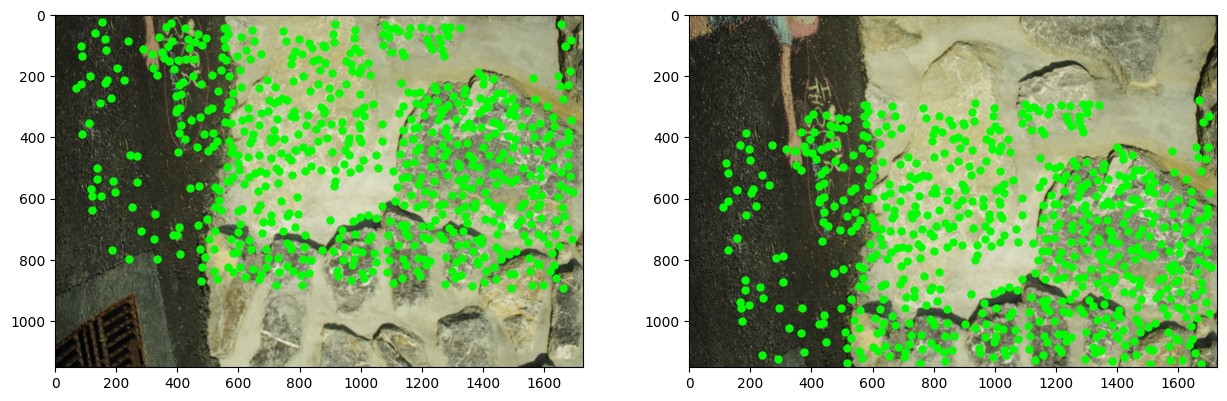

In [ ]:
# read feature points
features = ImportHom(dirData + '/IMGP4167_IMGP4168.JPG.txt')
features=np.asarray(features,dtype=float)

# plot feature points
im1data = mpimg.imread(dirData + '/' + im1name)
im2data = mpimg.imread(dirData + '/' + im2name)

fig, ax = plt.subplots(1,2,figsize=[15, 15])

ax[0].imshow(im1data,cmap='gray')
ax[0].scatter(features[:,0,0], features[:,0,1], c='lime', linewidths=0)

ax[1].imshow(im2data,cmap='gray')
ax[1].scatter(features[:,1,0], features[:,1,1], c='lime', linewidths=0)

In [ ]:
def ErrEssentialMatrix(E0 : tuple, bundles : tuple) :
  a, b, c, d, e, f, g, h = E0

  resTotal = 0.0

  E0 = np.array([[a,b,c], [d,e,f], [g,h,1.0]])

  # iterate over all bundles & update resTotal
  # bundles = [[(x1, y1, z1), (x2, y2, z2)]]
  for bundle in bundles:
      ft1, ft2 = bundle[0], bundle[1]
      ft1, ft2 = np.array(ft1), np.array(ft2)

      resTotal += (ft1 @ E0 @ ft2.T) ** 2

      # resTotal += (x1*a*x2 + x1*b*y2 + x1*c*z2 +
      #              y1*d*x2 + y1*e*y2 + y1*f*z2 +
      #              z1*g*x2 + z1*h*y2 + z1*i*z2) ** 2

  return resTotal


In [ ]:
# transform image poits to bundle
bundles_im1im2_V = []
for pt1, pt2 in features :
    bundles_im1im2_V.append([Pixel2Bundle(calib, pt1), Pixel2Bundle(calib, pt2)])


# inital values for E
Einit = [0,0,0,0,0,0,0,0]

# write cost/residual function & minimize
E = minimize(ErrEssentialMatrix, Einit, bundles_im1im2_V)

print('Essential matrix residual, init= ', ErrEssentialMatrix(Einit, bundles_im1im2_V), ', final= ',ErrEssentialMatrix(E.x, bundles_im1im2_V))

Essential matrix residual, init=  647.0 , final=  0.37822795391988534


In [ ]:
# transform image poits to bundle
bundles_im1im2_V = []
for pt1, pt2 in features :
    bundles_im1im2_V.append([Pixel2Bundle(calib, pt1), Pixel2Bundle(calib, pt2)])


# inital values for E
Einit = [0,0,0,0,0,0,0,0]

# write cost/residual function & minimize
E = minimize(ErrEssentialMatrix, Einit, bundles_im1im2_V)

print('Essential matrix residual, init= ', ErrEssentialMatrix(Einit, bundles_im1im2_V), ', final= ',ErrEssentialMatrix(E.x, bundles_im1im2_V))

Essential matrix residual, init=  647.0 , final=  1.5046997108181652e-07


# Compute relative orientation from the essential matrix



*Defintion*: A $3x3$ matrix is an essential matrix if and only if two of its singular values are **equal** and the third one is zero.

*Explanation*: The essential matrix is a product of a skew-symmetric (translation) and an orthogonal matrix (rotation); a skew-symmetric matrix has always two equal singular values and one singular value of value $0$; multiplication by the rotation does not change the singular values;

 <center>
  <img src="https://drive.google.com/uc?id=1XHOmmT17WYTKF-DTbk_PEJDjWoTgdoAN" height=250pix;/>
  <br>
</center>

### Preliminaries:

We know that
  - the essential matrix is:
  $$ E = [\mathbf{t}]_{\times} R $$
  - any skew-symmetric matrix $S$ decomposes into
  $$S = k UZU^T$$
  - note the two special matrices:
  $$ Z = \begin{bmatrix}  0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} \quad and \quad W = \begin{bmatrix}  0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$
where $Z$ is skew-symmtric and $W$ is orthogonal.

<!--- - up to sign
  $$Z = diag(1,1,0)W$$
  - up to scale
  $$S = U \cdot diag(1,1,0)W \cdot U^T $$
  - **hence**
  $$ E = SR = U \cdot diag(1,1,0) \cdot (W  U^T  R)  \quad \rightarrow two \quad equal \quad sing.values$$
Beause the two singular values are equal, $SVD$ of $E$ is not unique. There is a one-parameter family of solutons to E. In fact, there is a solution for any rotation matrix $2x2$ :
$$ E = (U diag(R_{2x2},1)) \cdot diag(1,1,0) \cdot (diag(R_{2x2}^T,1)) V^T $$   
-->


---
## There exist four solutions, i.e. four relative orientations from one $E$ matrix
### Theoretical derivation

(a) If the SVD of $E = U diag (1,1,0) V^T$, there are two possible factorization of
$$ E = SR $$
where $S$ is the antisymmetric matrix corresponding to the translation of the second camera wrt to the first, and the R is the respective rotation matrix. The solutions are:
$$ S = UZU^T $$ $$ R = UWV^T \quad or \quad R=UW^TV^T $$

*Proof*:
$$ U diag (1,1,0) V^T = E = SR = UZU^T \cdot UXV^T = U (ZU^TUX) V^T = U (ZX) V^T$$
and
$$ diag (1,1,0) = ZX $$
hence
$$ X = W \quad or \quad X=W^T$$

(b) The sign of $E$ and therefore the sign of $\mathbf{t}$ cannot be determined; both $\mathbf{t}$ ane $-\mathbf{t}$ are in the null-space of $E$.

$$S = [\mathbf{t}]_{\times} \rightarrow S\mathbf{t} = \mathbf{0}$$
hence the solution to $\mathbf{t}$ is the nullspace of $S$ which is the last column of $U$:
$$\mathbf{t} = U (0,0,1)^T $$




### In practice
Given an essential matrix E and supposing that the first camera is located at $(0,0,0)$ with the rotations $R_1= \mathcal{Id}$, there exist four possible solutions for the orientation of the second camera:

1. $R_{2,1} = UWV^T \quad  \mathbf{C}_{2,1} =  +\mathbf{t}$
2. $R_{2,2} = UWV^T \quad  \mathbf{C}_{2,2} = -\mathbf{t}$
3. $R_{2,3} = UW^TV^T \quad  \mathbf{C}_{2,3} = +\mathbf{t}$
4. $R_{2,4} = UW^TV^T \quad  \mathbf{C}_{2,4} = -\mathbf{t}$

**Note that $R$ and $\mathbf{C}$ express the camera in the world frame (camera to world transformation). It is often convenient to represent the opposite transformation, i.e. world to camera:**
$$ R = R^{-1} \quad \mathbf{t} = -R^{-1}\mathbf{C}$$

$$ p = RP + t \quad R^{-1}(p - t) = P \quad \rightarrow \quad R^{-1} p - R^{-1} t = P$$

Therefore, if the first camera has the (normalised[^3]) projection matrix[^2]:
$$ P_1 = [\mathcal{Id} |\mathbf{O}] $$

then, the second camera will be:
$$ P_2 = [R^{-1} |-R^{-1}\mathbf{C}] $$


 <center>
  <img src="https://drive.google.com/uc?id=1UFfZE1V6j2nMtaMK1IumngvCgyTlvJox" height=450pix;/>
  <br>
</center>

<br>

[^2]: The projection matrix relates 3D points with their positions in the images (2D points). It is a compact formulation (as a matrix) of the collinearity equations we have seen in the course.

[^3]: Normalised projection matrix, i.e., the projection matrix *corrected* for the camera calibration. Non-normalised projection matrix has the form $ P_1 = K [\mathcal{I} |\mathbf{O}] $



### Function that will save 3D points to a PLY file

In [ ]:
import struct
def SaveToPly(FileName,Points3D,RGBVal=[]):

    IsRGB=False
    if len(RGBVal):
        IsRGB = True

    NbPts = len(Points3D)

    FOut = open(FileName,'wb')

    FOut.write(bytes('ply\n', 'utf-8'))
    FOut.write(bytes('format binary_little_endian 1.0\n', 'utf-8'))
    FOut.write(bytes('element vertex %d\n'%NbPts, 'utf-8'))
    FOut.write(bytes('property float x\n', 'utf-8'))
    FOut.write(bytes('property float y\n', 'utf-8'))
    FOut.write(bytes('property float z\n', 'utf-8'))
    if IsRGB == True:
        FOut.write(bytes('property uchar red\n', 'utf-8'))
        FOut.write(bytes('property uchar green\n', 'utf-8'))
        FOut.write(bytes('property uchar blue\n', 'utf-8'))
    FOut.write(bytes('end_header\n', 'utf-8'))

    if IsRGB == False:
        for X,Y,Z in Points3D:
            FOut.write(bytearray(struct.pack("fff",X,Y,Z)))
    else :
        for XYZ,RGB in zip(Points3D,RGBVal):
            FOut.write(bytearray(struct.pack("fffccc",
                                         XYZ[0],XYZ[1],XYZ[2],
                                         RGB[0].tostring(),RGB[1].tostring(),RGB[2].tostring())))


    FOut.close()

### Transform camera to world extrinsics to world to camera

In [ ]:
def Cam2WToW2Cam(R,C) :

    ROut = np.linalg.inv(R) # None
    tOut = -np.matmul(ROut, C) # None

    return ROut,tOut

### Decompose E to four different solutions of R and t

In [ ]:
EMap = np.append(E.x, 1.0)
EMap = np.reshape(EMap, (3, 3))

In [ ]:
EMap

array([[  0.26917909, -22.23935917,  24.24436446],
       [ 21.40951107,   0.28452237,   6.30227717],
       [-22.08999065,  -6.32580118,   1.        ]])

In [ ]:
W = np.array([[0,-1,0],[1,0,0],[0,0,1]])

U, S, V = np.linalg.svd(EMap)
# print(U)
# t21 = U[:,-1]
t21 = U.dot([[0],[0],[1]])

R21 = U @ W @ V
R22 = U @ W.T @ V

# first solution
R2v1, t2v1 = Cam2WToW2Cam(R21, t21)
# 2nd
R2v2, t2v2 = Cam2WToW2Cam(R21, -t21)
# 3rd
R2v3, t2v3 = Cam2WToW2Cam(R22, t21)
# 4th
R2v4, t2v4 = Cam2WToW2Cam(R22, -t21)

# Convert to micmac
Rtv1MM = MMVII.Isometry3D(t2v1.squeeze(), MMVII.Rotation3D(R2v1))
Rtv2MM = MMVII.Isometry3D(t2v2.squeeze(), MMVII.Rotation3D(R2v2))
Rtv3MM = MMVII.Isometry3D(t2v3.squeeze(), MMVII.Rotation3D(R2v3))
Rtv4MM = MMVII.Isometry3D(t2v4.squeeze(), MMVII.Rotation3D(R2v4))

solutions = {
    'sol1' : MMVII.SensorCamPC('sol1', Rtv1MM, calib),
    'sol2' : MMVII.SensorCamPC('sol2', Rtv2MM, calib),
    'sol3' : MMVII.SensorCamPC('sol3', Rtv3MM, calib),
    'sol4' : MMVII.SensorCamPC('sol4', Rtv4MM, calib)
}

cam0 = MMVII.SensorCamPC('cam0', MMVII.Isometry3D(np.array([0.0, 0.0, 0.0]), MMVII.Rotation3D(np.eye(3,3,dtype=float))), calib)

#hint: save the fous solutions as a dictorionary of SensorCamPC, it will be easier to iterate over those results

In [ ]:
for solname in solutions:
    features3D = []
    for pt1, pt2 in features:
        #initialize the A matrix
        A = np.zeros([3, 3], dtype=float)
        b = np.zeros([3, 1], dtype=float)


        ####### camera0
        p00 = cam0.center
        p10 = Bundle2World(cam0, RadDistOnBundle(rad_coeff_inv, Pixel2Bundle(calib, pt1))) # Supprimer la distortion
        uvec0 = np.array((p10-p00) / np.linalg.norm(p10-p00))

        ####### camera1
        p01 = solutions[solname].center
        p11 = Bundle2World(solutions[solname], RadDistOnBundle(rad_coeff_inv, Pixel2Bundle(calib, pt2))) # Supprimer la distortion
        uvec1 = np.array((p11-p01) / np.linalg.norm(p11-p01))

        triangulate(np.array(p00), uvec0, A, b)
        triangulate(np.array(p01), uvec1, A, b)

        feat3D = np.linalg.solve(A, b)

        features3D.append(feat3D.squeeze())

    SaveToPly(solname + '2023.ply', features3D)
